### INTRODUCTION ###
**This is an "Analytic Report Assignment"**

In this assignment, I have a dataset of 5000 movies. I will analyze this data to show some important information.

I do my target, I'll spend 3 these steps:
- **Step 1**: DATA FILTERING AND CLEANING
- **Step 2**: VISUALIZATION
- **Step 3**: ANSWER SOME QUESTIONS ABOUT INFULENCE BETWEEN AREAS

Environment:
- **Jupyter notebook version 5.4.0**
- **Python version 3.6.4**

### 0.DESCRIPTION ###

Before go to 3 main steps, I'll explain to you the dataset.

Now, let start 3 main processes

In [1]:
# Import some libraries and do some setting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1. DATA FILTERING AND CLEANING ###

In this step, I will read dataset then check shape of dataset, columns (check if column's name is easy to understand, type of column's value), value of each columns to clean some error values. 

**Firstly**, let's import the dataset from *.csv* file and show the shape:

In [4]:
# reads the .csv and creates the dataframe called data
data = pd.read_csv('Data/tmdb_5000_movies.csv')

# get the shape of dataset
data.shape 

(4803, 20)

The output of this step *(4803, 20)* showed us that our data has *4803 rows* and *20 columns*. 

**Secondly**, Look some first samples. Now, let's show 3 first rows:

In [7]:
data.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,duration,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466




Take a fast look at column's names, I saw that all the column's names are easy to understand except '*runtime*' column. 

The '*runtime*' name means total time of a film, so I can change it to '*duration*', it's easier to understand. Let's rename the column:

In [6]:
data.rename(columns= {'runtime':'duration'},inplace= True)

Now, the columns are easy to understand, to check it, use the function *data.head(3)* again.

**Finally**, process NaN and NULL values

In this substep, I'll check *missing values* and process them. Use *.describe()* function as bellow:

In [23]:
data.shape

(4802, 20)

In [21]:
data.describe(include='all')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,duration,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.802000e+03,4802,1712,4802.000000,4802,4802,4802,4799,4802.000000,4802,4802,4802,4.802000e+03,4802.000000,4802,4802,3959,4802,4802.000000,4802.000000
unique,NaN,1175,1691,NaN,4222,37,4800,4799,NaN,3697,469,3280,NaN,NaN,544,3,3944,4799,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,NaN,[],en,Out of the Blue,"In the Olden Tymes, Count Regula is drawn and ...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Out of the Blue,NaN,NaN
freq,NaN,370,4,NaN,411,4504,2,1,NaN,350,2977,10,NaN,NaN,3171,4794,3,2,NaN,NaN
mean,2.905109e+07,NaN,NaN,57098.234902,NaN,NaN,NaN,NaN,21.496776,NaN,NaN,NaN,8.227777e+07,106.891087,NaN,NaN,NaN,NaN,6.093440,690.361724
std,4.072447e+07,NaN,NaN,88581.302370,NaN,NaN,NaN,NaN,31.818451,NaN,NaN,NaN,1.628697e+08,22.559528,NaN,NaN,NaN,NaN,1.191496,1234.674268
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000372,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,8.000000e+05,NaN,NaN,9013.750000,NaN,NaN,NaN,NaN,4.671734,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14626.500000,NaN,NaN,NaN,NaN,12.924931,NaN,NaN,NaN,1.917498e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.500000
75%,4.000000e+07,NaN,NaN,58589.750000,NaN,NaN,NaN,NaN,28.332017,NaN,NaN,NaN,9.291920e+07,117.750000,NaN,NaN,NaN,NaN,6.800000,737.000000


Take a look at the result, we can see that there are 4 columns which has missing value: 
 - *'homepage'* &ensp;&ensp;has 3091 rows missed value
 - *'overview'* &ensp;&ensp;has 3 rows missed value 
 - *'release_date'* &ensp;&ensp;has 1 row missed value
 - *'tagline'* &ensp;&ensp;has 844 rows missed value
 - *'duration'* &ensp;&ensp;has 2 rows missed value
 
I separated value into two group. The first one is *'string'* values and the other one is *'number'* values.

Luckily, all miss values are *'string'* values and missing values in 3 columns *'homepage'*, *'overview'*, *'tagline'* aren't important to our model, so I won't replace it. I'll process missing value for the column *'tagline'* and *'duration'*.


For the *'duration'* column: only 2 missing value, I'll **replace by value 90** after run *data.duration.value_counts()*

In [17]:
data.duration.value_counts() # get the highest value to replace the missing value in duration column. 

90.0     165
100.0    149
98.0     140
97.0     133
95.0     123
99.0     119
94.0     116
96.0     115
101.0    114
93.0     113
104.0    109
92.0     107
91.0     106
105.0    106
106.0    105
110.0    101
102.0    100
103.0     99
107.0     99
108.0     94
88.0      90
89.0      87
120.0     85
109.0     83
113.0     79
87.0      77
111.0     74
114.0     73
112.0     72
115.0     72
118.0     68
86.0      68
116.0     67
85.0      66
117.0     64
124.0     62
119.0     60
84.0      59
121.0     59
125.0     52
123.0     51
122.0     47
83.0      46
127.0     46
130.0     45
0.0       35
126.0     34
129.0     33
80.0      33
128.0     33
82.0      31
132.0     29
135.0     29
81.0      28
134.0     28
136.0     27
131.0     27
139.0     25
133.0     25
140.0     19
138.0     17
137.0     17
78.0      17
144.0     17
141.0     16
145.0     15
143.0     14
154.0     12
142.0     10
146.0      9
79.0       9
149.0      9
157.0      9
75.0       9
76.0       8
170.0      8
150.0      8

Replace NaN value in *'duration'* column by 90

In [16]:
data.fillna({'duration':90}, inplace= True) # Replace NaN value in duration column by 90

For the *'release_date'* column: only 1 missing value so we can replace by:
- an most frequency value (2006-01-01) -use function data.release_date.value_counts() to get that value.
- a random value.

Before choose the method, I'll check the row missed *'release_date'* value. Use bellow code to find which row has **NaN** as *'release_date'*

In [18]:
i = 0
for value in data['release_date'].isna():
    if value == True:
        print(i)
    i = i + 1

4553


The code showed **NaN** value of *'release_date'* is in row 4553. Let's look at row 4553:

In [19]:
pd.DataFrame(data, index = [4553])

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,duration,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


We can see, almost value in row 4553 are **NaN or 0.0** include some important field such as *'budget'*, *'popularity'*, *'revenue'*, *'duration'*,... So, I'll drop this drop from our dataset 

In [20]:
data.drop(data.index[4553], inplace= True) # Drop row 4553 from dataset

Now, we finished step **Data filtering and cleaning**.

### 2. VISUALIZATION ###

In this step, I'll show some special data

In [ ]:
sns.stripplot(x='id',y='rev',data)

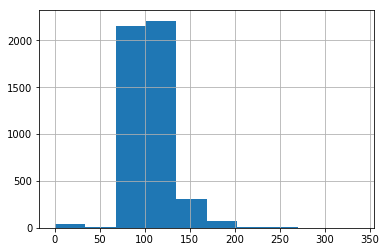

In [24]:
data.duration.hist()

In [37]:
num_list

Index(['budget', 'duration', 'id', 'popularity', 'revenue', 'vote_average',
       'vote_count'],
      dtype='object')

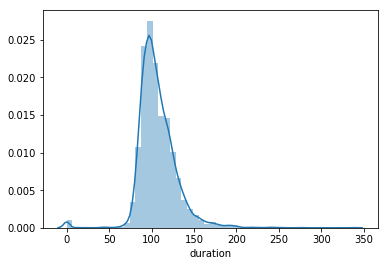

In [26]:
sns.distplot(data.duration)

In [38]:
data.revenue.value_counts()

0             1426
7000000          6
8000000          6
6000000          5
12000000         5
10000000         5
100000000        5
14000000         4
25000000         4
11000000         4
5000000          4
32000000         3
13000000         3
60000000         3
7800000          3
14400000         3
4000000          3
17000000         3
30000000         3
77000000         2
20000000         2
29000000         2
42000000         2
2200000          2
8500000          2
24000000         2
102000000        2
9000000          2
15000000         2
33400000         2
10400000         2
70000000         2
25               2
6800000          2
36000000         2
3200000          2
11               2
9600000          2
44000000         2
94000000         2
110000000        2
12               2
29400000         2
28200000         2
7                2
5284309          1
197309027        1
10300000         1
303788635        1
1400000          1
30857814         1
798958165        1
170000000   

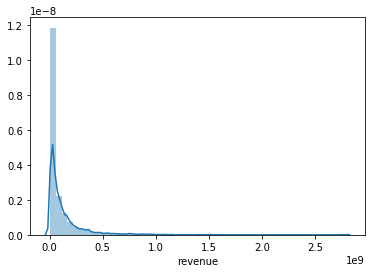

In [27]:
sns.distplot(data.revenue)

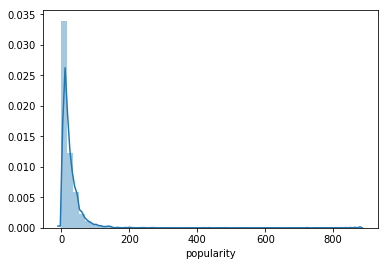

In [31]:
sns.distplot(data.popularity)

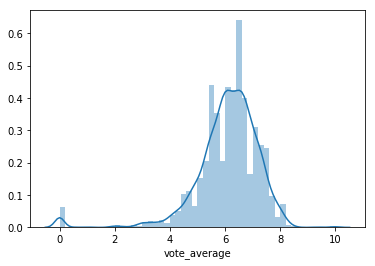

In [32]:
sns.distplot(data.vote_average)

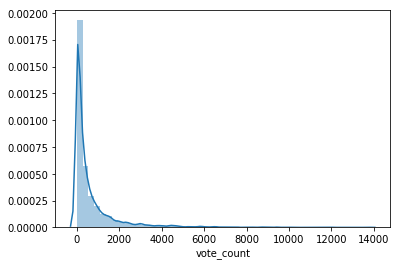

In [33]:
sns.distplot(data.vote_count)

In [29]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list)    

In [50]:
X = data[num_list]

In [44]:
X = X.cumsum()


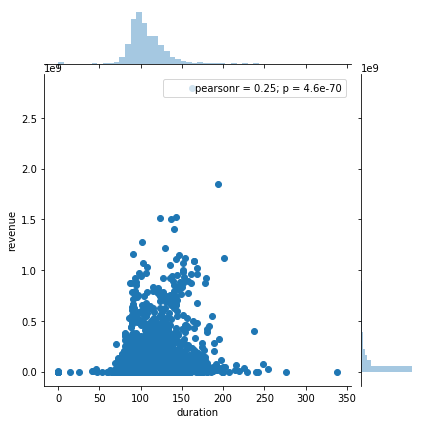

In [53]:
sns.jointplot(x="duration", y="revenue", data=data);

In [35]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [36]:
data.plot(y= 'imdb_score', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration',figsize=(12,8))

KeyError: 'imdb_score'

In [30]:
num_list

Index(['budget', 'duration', 'id', 'popularity', 'revenue', 'vote_average',
       'vote_count'],
      dtype='object')

**What areas have the most influence on revenue?**